------------------------v8 exercise -------------------------

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
import matplotlib.pyplot as plt

In [2]:

titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
t1 = titanic[['Pclass','Sex','Age','Fare','Survived']]
t1

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [4]:
x = t1.drop('Survived',axis =1)
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [5]:
x.Age = x.Age.fillna(x.Age.mean())


In [6]:
y = t1.Survived
y.isna().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



#x['Fare_'] = le.fit_transform(x['Fare'])
x['Sex_'] = le.fit_transform(x['Sex'])
#x['Age_'] = le.fit_transform(x['Age'])

In [8]:
x

,Pclass,Sex,Age,Fare,Sex_
0,3,male,22.000000,7.2500,1
1,1,female,38.000000,71.2833,0
2,3,female,26.000000,7.9250,0
3,1,female,35.000000,53.1000,0
4,3,male,35.000000,8.0500,1
...,...,...,...,...,...
886,2,male,27.000000,13.0000,1
887,1,female,19.000000,30.0000,0
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [9]:
x_ = x.drop(['Sex'],axis =1)
x_

,Pclass,Age,Fare,Sex_
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [10]:
x_.isna().sum()

Pclass    0
Age       0
Fare      0
Sex_      0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_,y,test_size=0.2,random_state =5)

len(X_train)

712

In [12]:
len(X_test)

179

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_test,y_test)

0.8100558659217877

In [15]:
model.predict([[3,44,34,1]])

array([0], dtype=int64)

In [16]:
model.predict([[3,35,8,1]])

array([0], dtype=int64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
r = 2

In [19]:
scores =[]
for k in range(r,20):

    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
    
print(scores)


[0.7094972067039106, 0.7653631284916201, 0.7374301675977654, 0.7597765363128491, 0.7262569832402235, 0.7374301675977654, 0.7541899441340782, 0.7430167597765364, 0.7653631284916201, 0.7597765363128491, 0.7541899441340782, 0.770949720670391, 0.7597765363128491, 0.7486033519553073, 0.7430167597765364, 0.7486033519553073, 0.7597765363128491, 0.7541899441340782]


In [20]:
kscore_max = max(scores)
print(kscore_max)

0.770949720670391


In [21]:
b=0
for a in scores :

    if(a == kscore_max):
        break
    b= b+1
print("maximum score is ", kscore_max ,"at k = ",b+r)  

maximum score is  0.770949720670391 at k =  13


In [22]:
knn = KNeighborsClassifier(n_neighbors =b+r)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [23]:
knn.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [24]:
print(knn.score(X_test,y_test))

0.770949720670391


------------------l14----------------------

Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
model.fit(X_train,y_train)

GaussianNB()

In [27]:
model.score(X_test, y_test)

0.8044692737430168

In [28]:
X_test[0:10]


,Pclass,Age,Fare,Sex_
126,3,29.699118,7.7500,1
354,3,29.699118,7.2250,1
590,3,35.000000,7.1250,1
509,3,26.000000,56.4958,1
769,3,32.000000,8.3625,1
545,1,64.000000,26.0000,1
759,1,33.000000,86.5000,0
261,3,3.000000,31.3875,1
329,1,16.000000,57.9792,0
349,3,42.000000,8.6625,1


In [29]:
y_test[0:10]

126    0
354    0
590    0
509    1
769    0
545    0
759    1
261    1
329    1
349    0
Name: Survived, dtype: int64

In [30]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [31]:
model.predict_proba(X_test[:10])

array([[0.95812511, 0.04187489],
       [0.95809792, 0.04190208],
       [0.96037296, 0.03962704],
       [0.91256578, 0.08743422],
       [0.95928971, 0.04071029],
       [0.72773713, 0.27226287],
       [0.01405119, 0.98594881],
       [0.90392931, 0.09607069],
       [0.03240758, 0.96759242],
       [0.96166673, 0.03833327]])

Cross validation

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.78321678, 0.85314685, 0.77464789, 0.78169014, 0.65492958])

------------------L15.2---------------------

#### Naive bayes

In [127]:
dfs = pd.read_csv("spam.csv")
dfs.head()

,Category,Message,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,uth jaaa nalayak,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN


In [128]:
dfs.count()

Category      5574
Message       5574
Unnamed: 2       1
dtype: int64

In [129]:
dfs['Unnamed: 2'].isna().sum()

5573

In [130]:
dfs.drop('Unnamed: 2', axis =1,inplace = True)
dfs.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,uth jaaa nalayak
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
corpus =[
    'This is the first document',
    'This document is the second document',
    'and this is the third one.',
    'Is this the first document?',
]

vect = CountVectorizer()
x = vect.fit_transform(corpus)
print(vect.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [132]:
print(x.toarray()[:])

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [133]:
dfs.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,uth jaaa nalayak
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
dfs.groupby('Category').count()

,Message
Category,
ham,4825
ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACKS  FUCKINNICE!SELFISH,1
ham\tYeah,1
spam,747


In [135]:
dfs.loc[(dfs.Category != 'ham') & (dfs.Category != 'spam')].head()

,Category,Message
5082,ham\tYeah,give me a call if you've got a minute
5083,ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...,DEVIOUSBITCH.ANYWAY


In [136]:
#dfs.drop([dfs.index[5082],dfs.index[5083]],inplace = True)

# or

dfs.drop(dfs.index[5082:5084], inplace = True)


In [137]:
dfs.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


In [138]:
dfs['spam']=dfs['Category'].apply(lambda x: 1 if x=='spam' else 0)
dfs.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,uth jaaa nalayak,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [156]:
X_train, X_test, y_train, y_test = train_test_split(dfs.Message,dfs.spam)

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train_count,y_train)

MultinomialNB()

In [159]:
emails = [
    'Hey vansh, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [160]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9885139985642498

In [161]:
# here we needed to transform X_train and X_test and even emails to vectorizer everytime
#instead we can use pipeline

#### Pipeline

In [162]:
from sklearn.pipeline import Pipeline
pp = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [163]:
pp.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [164]:
pp.score(X_test,y_test)

0.9885139985642498

In [165]:
pp.predict(emails[:])

array([0, 1], dtype=int64)

In [166]:
pp.predict_proba(emails)
# not spam ,  spam

array([[9.99984482e-01, 1.55175189e-05],
       [2.56940134e-02, 9.74305987e-01]])

In [167]:
X_test.head()

2955    Think i might have to give it a miss. Am teach...
3578      Yeah confirmed for you staying at  that weekend
2153    Hi kindly give us back our documents which we ...
3360    Sorry I missed your call let's talk when you h...
1307    Enjoy the jamster videosound gold club with yo...
Name: Message, dtype: object

In [168]:
pp.predict(X_test[:5])

array([0, 0, 0, 0, 1], dtype=int64)

In [169]:
pp.predict_proba(X_test[:5])

array([[1.00000000e+00, 2.78874141e-11],
       [9.99967643e-01, 3.23572619e-05],
       [9.71972346e-01, 2.80276544e-02],
       [9.99997093e-01, 2.90718879e-06],
       [1.93261967e-12, 1.00000000e+00]])

------------------L16----------------------
### Grid search cv

In [179]:
from sklearn.datasets import load_digits
from sklearn import svm
digits = load_digits()

<Figure size 360x360 with 0 Axes>

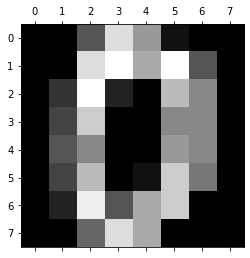

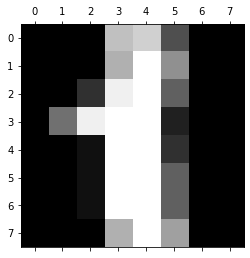

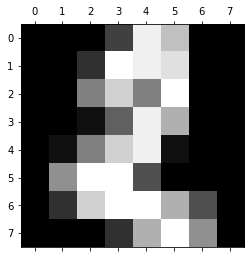

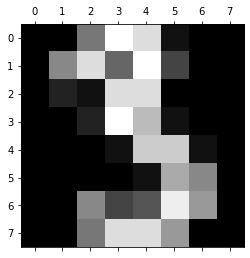

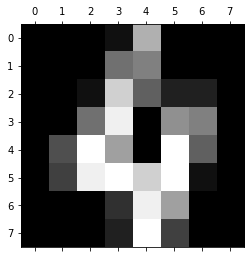

In [180]:
plt.figure(figsize=(5,5))
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 
    


In [181]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [182]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df['target'] = digits.target
df['target'] = df['target'].apply(lambda x: digits.target_names[x])
df[47:150]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1
48,0.0,0.0,2.0,15.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,15.0,6.0,0.0,0.0,0
49,0.0,0.0,1.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,14.0,8.0,0.0,0.0,0
50,0.0,0.0,0.0,5.0,14.0,12.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,13.0,3.0,0.0,2
51,0.0,0.0,0.0,3.0,15.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,9.0,14.0,7.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,4.0,15.0,16.0,16.0,16.0,4.0,0.0,0.0,4.0,...,0.0,0.0,5.0,16.0,16.0,12.0,0.0,0.0,0.0,5
146,0.0,0.0,0.0,6.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,14.0,6.0,0.0,6
147,0.0,0.0,3.0,15.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,1.0,0.0,0.0,0.0,7
148,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,3.0,13.0,16.0,10.0,1.0,0.0,8


In [196]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [197]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.4685185185185185

In [198]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),digits.data, digits.target, cv=5)

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [199]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),digits.data, digits.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

In [202]:
cross_val_score(svm.SVC(kernel='linear',C=187,gamma='auto'),digits.data, digits.target, cv=5)

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [203]:
#Above approach is tiresome and very manual. We can use for loop as an alternative

In [204]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),digits.data, digits.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores


{'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_20': 0.47636645001547506,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_20': 0.9476973073351903}

In [205]:
# instead we can use grid search cv in lesser steps

In [208]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,65],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.19616394, 0.02068629, 0.186656  , 0.02146754, 0.18857684,
        0.01989608]),
 'std_fit_time': array([0.01316001, 0.0035979 , 0.00389064, 0.00399917, 0.00344063,
        0.00409509]),
 'mean_score_time': array([0.05621138, 0.00658035, 0.05593085, 0.00501437, 0.05452285,
        0.00659447]),
 'std_score_time': array([0.00339593, 0.00329466, 0.00318466, 0.00400147, 0.004006  ,
        0.00329887]),
 'param_C': masked_array(data=[1, 1, 10, 10, 65, 65],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 65, 'kernel': 'rbf'},
  {'C': 65, 'kernel': 'linear'}],


In [209]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196164,0.013160,0.056211,0.003396,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
1,0.020686,0.003598,0.006580,0.003295,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.186656,0.003891,0.055931,0.003185,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
3,0.021468,0.003999,0.005014,0.004001,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
4,0.188577,0.003441,0.054523,0.004006,65,rbf,"{'C': 65, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
5,0.019896,0.004095,0.006594,0.003299,65,linear,"{'C': 65, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1


In [210]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,10,rbf,0.476366
3,10,linear,0.947697
4,65,rbf,0.476366
5,65,linear,0.947697


In [211]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [213]:
clf.best_score_

0.9476973073351903

In [214]:
#Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. 
#This is useful when you have too many parameters to try and your training time is longer.
# It helps reduce the cost of computation

In [219]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(digits.data, digits.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.476366
1,10,linear,0.947697


In [220]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,75,200],
            'kernel': ['rbf','linear']
        }  
    },
    
    
    'NB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': [1,15,30]
        }  
    },
    
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,8],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }  
    },
    
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [222]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,NB,0.877029,{'alpha': 30}
2,KNN,0.966622,"{'algorithm': 'auto', 'n_neighbors': 3}"
3,random_forest,0.893183,{'n_estimators': 10}
4,logistic_regression,0.922114,{'C': 1}
